In [8]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [35]:
# Columns is a list of lists describing the number of times each one indexed column should be counted for this allele
# eg [[1, 1, 2], [2, 3, 3]] if the given genotypes are WW, WR, and RR
# alleleNames is a list of the allele names for use as column titles eg ["W", "R"]
# startCol is the first column in the csv which lists genotypes, one indexed. 
# Column 1 in the column argument corresponds to startCol in the table.
# returns 1 summed list for each list in columns, each containing the specified sum: eg  col 1 + col 1 + col 2        
def alleleCounts(csvFileName, columns, alleleNames, startCol = 3):
    data = np.genfromtxt(csvFileName, dtype=int, skip_header=1, delimiter=",")
    res = df[['Time', 'Patch']]
    for i in range(len(columns)):
        # summed_col contains sum of counts for one allele, such as W
        summed_col = np.zeros_like(data[:,0])
        for index in columns[i]:
            # subtract 2 because index and start col are 1 indexed
            summed_col += data[:,index+startCol - 2]
        allele = alleleNames[i]
        res.insert(i + startCol - 1, alleleNames[i], summed_col)
    return res
        

Example of summing alleles W and R given genotypes WW, WR, and RR

In [36]:
csvFileName = "CRISPR_SIT/ADM_Run1_Rep1_Patch0000.csv"
df = pd.read_csv(csvFileName)
display(df.head())
counts = alleleCounts(csvFileName, [[1, 1, 2], [2, 3, 3]], ['W', 'R'])
display(counts.head())

,Time,Patch,WW,WR,RR
0,1,0,10025,0,0
1,2,0,10000,0,0
2,3,0,9920,0,0
3,4,0,9870,0,0
4,5,0,9852,0,0


,Time,Patch,W,R
0,1,0,20050,0
1,2,0,20000,0
2,3,0,19840,0
3,4,0,19740,0
4,5,0,19704,0


Given many CSV files and a gender, make data frame with one allele count column for each run of that gender, eg $W_1 W_2 ... W_n$ representing the count of W over n experiments on female mosquitoes

In [44]:
def allCounts(csvPath, columns, alleleName, female=True):
    if female:
        files = glob.glob(csvPath + 'AF1*.csv')
    else:
        files = glob.glob(csvPath + 'ADM*.csv')
    res = df[['Time', 'Patch']]
    for i in range(len(files)):
        count_df = alleleCounts(files[i], [columns], [alleleName])
        res.insert(i + 2, alleleName + str(i+1), (count_df[alleleName]).copy())
    return res

In [46]:
#note: columns are not in same order as experiment repeats
counts = allCounts("CRISPR_SIT/", [1, 1, 2], "W")

ValueError: labels ['Patch'] not contained in axis

In [53]:
counts = counts.drop('Patch', axis=1)
display(counts.head())

,Time,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W1991,W1992,W1993,W1994,W1995,W1996,W1997,W1998,W1999,W2000
0,1,20060,19874,19754,19846,20056,19894,19924,20088,20142,...,20002,20178,19934,20030,20060,20072,20088,19952,19998,20022
1,2,20064,19816,19830,19822,20096,19900,19902,20222,20030,...,20202,20156,20024,20052,20018,19966,19984,19804,19920,20064
2,3,20106,19846,19898,19876,20140,19876,19940,20212,20020,...,20226,20134,20032,20122,20026,20034,19834,19802,19920,20088
3,4,20050,19858,19924,19706,20144,19968,19942,20308,20048,...,20060,20198,20060,19990,20012,20112,19890,19760,19812,20206
4,5,20076,19836,19828,19694,20124,20018,20042,20282,19962,...,20136,20006,19904,20010,19970,20134,20066,19844,19814,20312


Plot allele counts over time: each trace represents one experiment (CSV file) and the opacity and thickness of the trace are parameters

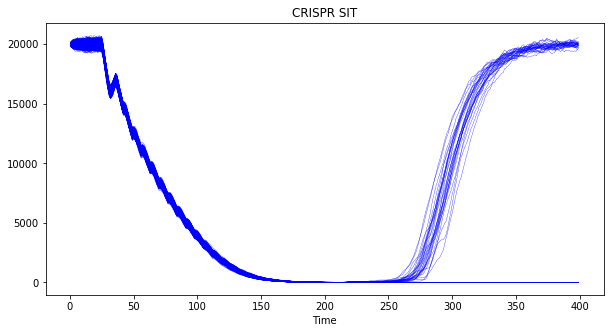

In [66]:
# AF1 = females, ADM = males: should take in whole folder and choose whether to plot male or female CSV files
# for crispr sit, plot AF1 csv files with W alleles
rgba = (0.1, 0.1, 0.9, 0.3)
counts.plot(x="Time", figsize=(10, 5), linewidth = 0.3, legend=False, title = "CRISPR SIT", color = 'b')